# 판다스 라이브러리 임포트

In [251]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats

# Train dataset, Test dataset 불러오기

In [252]:
# 1. 데이터 불러오기 및 데이터 확인
df= pd.read_csv("C:\\ML_Project\\train.csv")
df.head()

,ID,매물확인방식,보증금,월세,전용면적,해당층,총층,방향,방수,욕실수,주차가능여부,총주차대수,관리비,중개사무소,제공플랫폼,게재일,허위매물여부
0,TRAIN_0000,현장확인,402500000.0,470000,NaN,NaN,15.0,서향,1.0,1.0,가능,40.0,96,t93Nt6I2I0,B플랫폼,2024-10-09,0
1,TRAIN_0001,현장확인,170500000.0,200000,NaN,3.0,4.0,남동향,2.0,1.0,불가능,NaN,0,q39iV5J4E6,D플랫폼,2024-12-26,0
2,TRAIN_0002,전화확인,114000000.0,380000,NaN,2.0,3.0,동향,1.0,1.0,불가능,NaN,0,b03oE4G3F6,A플랫폼,2024-11-28,0
3,TRAIN_0003,현장확인,163500000.0,30000,36.3,3.0,9.0,남동향,2.0,1.0,가능,13.0,10,G52Iz8V2B9,A플랫폼,2024-11-26,0
4,TRAIN_0004,현장확인,346000000.0,530000,NaN,3.0,3.0,동향,2.0,1.0,불가능,NaN,0,N45gM0M7R0,B플랫폼,2024-06-25,1


In [253]:
from sklearn.model_selection import train_test_split

target = "허위매물여부"

shuffle= True
train, test=train_test_split(df,test_size=0.2, random_state=42, stratify=df[target]) 

# Train dataset

In [254]:
# train 데이터셋 상위 5개 행만 확인
train.head(5)


,ID,매물확인방식,보증금,월세,전용면적,해당층,총층,방향,방수,욕실수,주차가능여부,총주차대수,관리비,중개사무소,제공플랫폼,게재일,허위매물여부
55,TRAIN_0055,전화확인,172000000.0,580000,27.16,2.0,5.0,북향,1.0,1.0,불가능,31.0,4,G52Iz8V2B9,A플랫폼,2025-03-02,0
564,TRAIN_0564,현장확인,20500000.0,370000,44.69,10.0,14.0,남향,1.0,1.0,불가능,10.0,3,G52Iz8V2B9,A플랫폼,2023-09-10,0
820,TRAIN_0820,전화확인,393000000.0,250000,NaN,2.0,3.0,동향,2.0,1.0,불가능,NaN,0,N00fb8Z9A4,D플랫폼,2024-10-07,0
2395,TRAIN_2395,현장확인,365000000.0,330000,35.30,1.0,6.0,남서향,1.0,1.0,불가능,39.0,5,G52Iz8V2B9,E플랫폼,2023-09-28,0
1809,TRAIN_1809,전화확인,139500000.0,120000,17.50,7.0,8.0,서향,1.0,1.0,불가능,45.0,3,G52Iz8V2B9,A플랫폼,2024-07-31,0


In [255]:
# train 데이터셋 상위 10개 행만 확인
train.head(10)

,ID,매물확인방식,보증금,월세,전용면적,해당층,총층,방향,방수,욕실수,주차가능여부,총주차대수,관리비,중개사무소,제공플랫폼,게재일,허위매물여부
55,TRAIN_0055,전화확인,172000000.0,580000,27.16,2.0,5.0,북향,1.0,1.0,불가능,31.0,4,G52Iz8V2B9,A플랫폼,2025-03-02,0
564,TRAIN_0564,현장확인,20500000.0,370000,44.69,10.0,14.0,남향,1.0,1.0,불가능,10.0,3,G52Iz8V2B9,A플랫폼,2023-09-10,0
820,TRAIN_0820,전화확인,393000000.0,250000,NaN,2.0,3.0,동향,2.0,1.0,불가능,NaN,0,N00fb8Z9A4,D플랫폼,2024-10-07,0
2395,TRAIN_2395,현장확인,365000000.0,330000,35.30,1.0,6.0,남서향,1.0,1.0,불가능,39.0,5,G52Iz8V2B9,E플랫폼,2023-09-28,0
1809,TRAIN_1809,전화확인,139500000.0,120000,17.50,7.0,8.0,서향,1.0,1.0,불가능,45.0,3,G52Iz8V2B9,A플랫폼,2024-07-31,0
1714,TRAIN_1714,현장확인,171000000.0,150000,18.63,4.0,17.0,동향,1.0,1.0,불가능,36.0,0,G52Iz8V2B9,B플랫폼,2023-10-23,0
1563,TRAIN_1563,현장확인,321500000.0,660000,17.50,5.0,11.0,남동향,1.0,1.0,가능,NaN,11,C41wx1K6U9,B플랫폼,2024-10-08,0
1903,TRAIN_1903,현장확인,22500000.0,60000,NaN,2.0,3.0,남동향,2.0,1.0,불가능,NaN,0,U93ap2F8Z1,C플랫폼,2024-12-22,0
329,TRAIN_0329,현장확인,122500000.0,200000,17.50,10.0,12.0,서향,1.0,1.0,가능,26.0,9,G52Iz8V2B9,A플랫폼,2024-12-09,0
1811,TRAIN_1811,현장확인,369000000.0,400000,24.01,NaN,10.0,남서향,2.0,1.0,가능,8.0,4,r82ax9M3U3,B플랫폼,2024-08-24,0


In [256]:
# train 데이터셋 하위 5개 행만 확인
train.tail(5)

,ID,매물확인방식,보증금,월세,전용면적,해당층,총층,방향,방수,욕실수,주차가능여부,총주차대수,관리비,중개사무소,제공플랫폼,게재일,허위매물여부
1885,TRAIN_1885,현장확인,105000000.0,660000,17.52,NaN,5.0,서향,1.0,1.0,불가능,8.0,17,M92wE9E7E5,A플랫폼,2023-10-06,1
1385,TRAIN_1385,현장확인,173500000.0,80000,NaN,3.0,6.0,동향,1.0,1.0,불가능,1.0,12,r16Dr6Z7C3,G플랫폼,2024-05-30,1
1817,TRAIN_1817,현장확인,88000000.0,80000,31.97,2.0,6.0,남동향,1.0,1.0,가능,18.0,10,G52Iz8V2B9,D플랫폼,2024-02-16,0
850,TRAIN_0850,현장확인,146500000.0,540000,NaN,5.0,6.0,남향,2.0,1.0,가능,NaN,0,w37Qk3B9D2,B플랫폼,2024-10-13,0
922,TRAIN_0922,현장확인,75000000.0,150000,19.83,3.0,6.0,남서향,1.0,1.0,불가능,5.0,1,A72Mx9C8U2,A플랫폼,2024-10-19,0


## ID 열 제거

In [257]:
# 분석에 필요없는 열 제거
train = train.drop('ID',axis=1)
test= test.drop('ID',axis=1)

## 열 확인

In [258]:
print(train.columns)
print(test.columns)

Index(['매물확인방식', '보증금', '월세', '전용면적', '해당층', '총층', '방향', '방수', '욕실수', '주차가능여부',
       '총주차대수', '관리비', '중개사무소', '제공플랫폼', '게재일', '허위매물여부'],
      dtype='object')
Index(['매물확인방식', '보증금', '월세', '전용면적', '해당층', '총층', '방향', '방수', '욕실수', '주차가능여부',
       '총주차대수', '관리비', '중개사무소', '제공플랫폼', '게재일', '허위매물여부'],
      dtype='object')


## 데이터 구조 확인하기

In [259]:
# 데이터의 행과 열의 개수를 알 수 있음
print('데이터 모양')
print(train.shape)

# 데이터 타입, 개수 등 정보를 알 수 있음
print('데이터 정보')
print(train.info())

# 매물확인방식, 방향, 주차가능여부, 중개사무소, 제공플랫폼, 게재일 변수는 숫자형 데이터가 아님을 확인 할 수 있음.

데이터 모양
(1961, 16)
데이터 정보
<class 'pandas.core.frame.DataFrame'>
Index: 1961 entries, 55 to 922
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   매물확인방식  1961 non-null   object 
 1   보증금     1961 non-null   float64
 2   월세      1961 non-null   int64  
 3   전용면적    1319 non-null   float64
 4   해당층     1780 non-null   float64
 5   총층      1945 non-null   float64
 6   방향      1961 non-null   object 
 7   방수      1945 non-null   float64
 8   욕실수     1943 non-null   float64
 9   주차가능여부  1961 non-null   object 
 10  총주차대수   1383 non-null   float64
 11  관리비     1961 non-null   int64  
 12  중개사무소   1961 non-null   object 
 13  제공플랫폼   1961 non-null   object 
 14  게재일     1961 non-null   object 
 15  허위매물여부  1961 non-null   int64  
dtypes: float64(7), int64(3), object(6)
memory usage: 260.4+ KB
None


## 게재일 날짜형으로 변환

In [260]:
# 날짜형 변환
train['게재일'] = pd.to_datetime(train['게재일'])
test['게재일']= pd.to_datetime(test['게재일'])

## 타겟 분포 확인하기

In [261]:
# 허위매물여부 클래스별 개수와 비율 확인
target_counts = train['허위매물여부'].value_counts()
target_ratio = train['허위매물여부'].value_counts(normalize= True) 

print("클래스별 개수:\n", target_counts)
print("\n클래스별 비율:\n", target_ratio.round(3))

# 허위매물여부가 0인 데이터가 더 많으므로 불균형 데이터셋임을 알 수 있음.

클래스별 개수:
 허위매물여부
0    1723
1     238
Name: count, dtype: int64

클래스별 비율:
 허위매물여부
0    0.879
1    0.121
Name: proportion, dtype: float64


## 결측치 확인하기

In [262]:
print(train.isnull().sum())
# 전체 데이터 2452개 중 전용면적과 총 주차대수의 결측이 상당히 많다는 것을 알 수 있음.
# 또한 수치형 변수만 결측치가 존재함을 알 수 있음.

매물확인방식      0
보증금         0
월세          0
전용면적      642
해당층       181
총층         16
방향          0
방수         16
욕실수        18
주차가능여부      0
총주차대수     578
관리비         0
중개사무소       0
제공플랫폼       0
게재일         0
허위매물여부      0
dtype: int64


## 기초 통계량 확인하기

In [263]:
train.describe()

# 수치형 변수 중 방수와 욕실수 변수는 1과 2로만 이루어짐
## 욕실수의 평균은 1.03으로 대부분이 1개임을 알 수 있음.

# 월세 최소값이 0인 데이터가 존재함을 알 수 있음

,보증금,월세,전용면적,해당층,총층,방수,욕실수,총주차대수,관리비,게재일,허위매물여부
count,1.961000e+03,1961.000000,1319.000000,1780.000000,1945.000000,1945.000000,1943.000000,1383.000000,1961.000000,1961,1961.000000
mean,1.561917e+08,379974.502805,27.137574,4.756180,7.967095,1.383033,1.033968,19.936370,5.374299,2024-08-05 01:26:38.980112128,0.121367
min,5.000000e+06,0.000000,17.500000,1.000000,2.000000,1.000000,1.000000,1.000000,0.000000,2023-04-28 00:00:00,0.000000
25%,7.350000e+07,200000.000000,19.830000,2.000000,4.000000,1.000000,1.000000,4.000000,0.000000,2024-05-23 00:00:00,0.000000
50%,1.315000e+08,380000.000000,26.440000,4.000000,6.000000,1.000000,1.000000,10.000000,5.000000,2024-09-19 00:00:00,0.000000
75%,1.885000e+08,550000.000000,32.365000,6.000000,10.000000,2.000000,1.000000,30.500000,9.000000,2024-11-13 00:00:00,0.000000
max,4.090000e+08,750000.000000,49.970000,21.000000,21.000000,2.000000,2.000000,590.000000,96.000000,2025-03-03 00:00:00,1.000000
std,1.212142e+08,205963.017689,8.001038,3.477559,4.880986,0.486251,0.181194,28.574684,5.699502,NaN,0.326636


In [264]:
# 월세가 0인 데이터만 뽑기
train_월세0 = train[train["월세"]==0]
train_월세0

# 월세가 0인 데이터는 모두 허위매물임을 알 수 있음

,매물확인방식,보증금,월세,전용면적,해당층,총층,방향,방수,욕실수,주차가능여부,총주차대수,관리비,중개사무소,제공플랫폼,게재일,허위매물여부
188,현장확인,5000000.0,0,NaN,4.0,4.0,동향,1.0,1.0,불가능,1.0,9,Z18up3D1C3,A플랫폼,2024-08-27,1
725,서류확인,364000000.0,0,17.50,10.0,16.0,북동향,1.0,1.0,가능,34.0,0,R17wi5N4M8,D플랫폼,2024-05-19,1
809,현장확인,108500000.0,0,18.87,NaN,16.0,동향,1.0,1.0,가능,54.0,0,G38pb6B9C7,C플랫폼,2024-07-16,1
1305,현장확인,18000000.0,0,17.50,NaN,17.0,남동향,1.0,1.0,가능,99.0,0,y86qM5T6T6,A플랫폼,2024-05-16,1


## 결측치 채우기

In [265]:
# 전용면적은 중앙값으로 대체
train['전용면적'] = train['전용면적'].fillna(train['전용면적'].median())
test['전용면적']= test['전용면적'].fillna(test['전용면적'].median())

# 총주차대수는 0으로 대체
train['총주차대수'] = train['총주차대수'].fillna(0)
test['총주차대수'] = test['총주차대수'].fillna(0)

# 나머지는 최빈값으로 대체
train['해당층'] = train['해당층'].fillna(train['해당층'].mode()[0])
train['총층'] = train['총층'].fillna(train['총층'].mode()[0])
train['방수'] = train['방수'].fillna(train['방수'].mode()[0])
train['욕실수'] = train['욕실수'].fillna(train['욕실수'].mode()[0])

test['해당층'] = test['해당층'].fillna(test['해당층'].mode()[0])
test['총층'] = test['총층'].fillna(test['총층'].mode()[0])
test['방수'] = test['방수'].fillna(test['방수'].mode()[0])
test['욕실수'] = test['욕실수'].fillna(test['욕실수'].mode()[0])


print("처리 후 train 결측값 수: ", train.isnull().sum().sum())
print("처리 후 test 결측값 수: ", test.isnull().sum().sum())

처리 후 train 결측값 수:  0
처리 후 test 결측값 수:  0


In [266]:
# 제대로 결측값이 대치되었는지 상위 10개 행으로 확인
train.head(10)

,매물확인방식,보증금,월세,전용면적,해당층,총층,방향,방수,욕실수,주차가능여부,총주차대수,관리비,중개사무소,제공플랫폼,게재일,허위매물여부
55,전화확인,172000000.0,580000,27.16,2.0,5.0,북향,1.0,1.0,불가능,31.0,4,G52Iz8V2B9,A플랫폼,2025-03-02,0
564,현장확인,20500000.0,370000,44.69,10.0,14.0,남향,1.0,1.0,불가능,10.0,3,G52Iz8V2B9,A플랫폼,2023-09-10,0
820,전화확인,393000000.0,250000,26.44,2.0,3.0,동향,2.0,1.0,불가능,0.0,0,N00fb8Z9A4,D플랫폼,2024-10-07,0
2395,현장확인,365000000.0,330000,35.30,1.0,6.0,남서향,1.0,1.0,불가능,39.0,5,G52Iz8V2B9,E플랫폼,2023-09-28,0
1809,전화확인,139500000.0,120000,17.50,7.0,8.0,서향,1.0,1.0,불가능,45.0,3,G52Iz8V2B9,A플랫폼,2024-07-31,0
1714,현장확인,171000000.0,150000,18.63,4.0,17.0,동향,1.0,1.0,불가능,36.0,0,G52Iz8V2B9,B플랫폼,2023-10-23,0
1563,현장확인,321500000.0,660000,17.50,5.0,11.0,남동향,1.0,1.0,가능,0.0,11,C41wx1K6U9,B플랫폼,2024-10-08,0
1903,현장확인,22500000.0,60000,26.44,2.0,3.0,남동향,2.0,1.0,불가능,0.0,0,U93ap2F8Z1,C플랫폼,2024-12-22,0
329,현장확인,122500000.0,200000,17.50,10.0,12.0,서향,1.0,1.0,가능,26.0,9,G52Iz8V2B9,A플랫폼,2024-12-09,0
1811,현장확인,369000000.0,400000,24.01,2.0,10.0,남서향,2.0,1.0,가능,8.0,4,r82ax9M3U3,B플랫폼,2024-08-24,0


## 범주형 변수 값 확인

In [267]:
# 매물확인방식은 3개의 값, 방향은 8개, 주차가능여부는 2개, 제공플랫폼은 13개, 중개사무소는 매우 다양한 값을 가짐을 알 수 있음.

In [268]:
train['매물확인방식'].value_counts()

매물확인방식
현장확인    1361
전화확인     306
서류확인     294
Name: count, dtype: int64

In [269]:
train['방향'].value_counts()

방향
남향     497
동향     476
서향     311
남동향    220
남서향    176
북향     159
북서향     62
북동향     60
Name: count, dtype: int64

In [270]:
train['주차가능여부'].value_counts()

주차가능여부
가능     990
불가능    971
Name: count, dtype: int64

In [271]:
train['제공플랫폼'].value_counts()

제공플랫폼
A플랫폼    765
B플랫폼    490
C플랫폼    279
D플랫폼    155
E플랫폼    106
G플랫폼     48
F플랫폼     43
H플랫폼     30
I플랫폼     18
J플랫폼     12
L플랫폼      7
K플랫폼      7
M플랫폼      1
Name: count, dtype: int64

In [272]:
train['중개사무소'].value_counts()

중개사무소
G52Iz8V2B9    629
r82ax9M3U3     34
H90uE4C0W5     25
J52gJ2E4T6     25
b87Td0W4Y3     23
             ... 
t73fe0B0C7      1
V71Gz2X2C5      1
l54dY7J9Q0      1
W41Lj5D2B6      1
O42Rj2E3H5      1
Name: count, Length: 262, dtype: int64

# 파생변수 만들기

In [273]:
# 게재일 변수에서 월과 일을 추출
train["month"]=train['게재일'].dt.month
train["day"]=train['게재일'].dt.day

test["month"]=test['게재일'].dt.month
test["day"]=test['게재일'].dt.day

# day 변수를 초,중,말로 표현하기
bins=[0,10,20,31]
labels=["초","중","말"]
train["day"]=pd.cut(train["day"],bins=bins,labels=labels)
test["day"]=pd.cut(test["day"],bins=bins,labels=labels)

# month 변수를 분기로 표현하기

bins=[0,3,6,9,12]
labels=["1분기","2분기","3분기","4분기"]
train["month"]=pd.cut(train["month"],bins=bins,labels=labels)
test["month"]=pd.cut(test["month"],bins=bins,labels=labels)

#  게재일 변수 삭제하기
train.drop(columns=["게재일"], inplace=True)
test.drop(columns=["게재일"], inplace=True)

# 1,2,3월 -> 1분기 , 4,5,6월 -> 2분기 , 7,8,9월 -> 3분기 , 10,11,12월 -> 4분기
# month - 1 을 3으로 나눈 몫에 1을 더하면 분기를 구할 수 있음.

# train["분기"]=((train["month"]-1)//3)+1

# 1,2,3,4,5,6월 -> 상반기(1반기) , 7,8,9,10,11,12월 -> 하반기(2반기)
# month - 1 을 6으로 나눈 몫에 1을 더하면 반기를 구할 수 있음.

# train["반기"]=((train["month"]-1)//6)+1



In [274]:
# 층 비율 변수 추가
train["층 비율"]=train["해당층"]/train["총층"]
test["층 비율"]=test["해당층"]/test["총층"]

# 면적 대비 방수 & 욕실수 추가
train["면적 대비 방수"]= train["방수"]/train["전용면적"]
train["면적 대비 욕실수"]= train["욕실수"]/train["전용면적"]

test["면적 대비 방수"]= test["방수"]/test["전용면적"]
test["면적 대비 욕실수"]= test["욕실수"]/test["전용면적"]


In [275]:
train.head()

,매물확인방식,보증금,월세,전용면적,해당층,총층,방향,방수,욕실수,주차가능여부,총주차대수,관리비,중개사무소,제공플랫폼,허위매물여부,month,day,층 비율,면적 대비 방수,면적 대비 욕실수
55,전화확인,172000000.0,580000,27.16,2.0,5.0,북향,1.0,1.0,불가능,31.0,4,G52Iz8V2B9,A플랫폼,0,1분기,초,0.400000,0.036819,0.036819
564,현장확인,20500000.0,370000,44.69,10.0,14.0,남향,1.0,1.0,불가능,10.0,3,G52Iz8V2B9,A플랫폼,0,3분기,초,0.714286,0.022376,0.022376
820,전화확인,393000000.0,250000,26.44,2.0,3.0,동향,2.0,1.0,불가능,0.0,0,N00fb8Z9A4,D플랫폼,0,4분기,초,0.666667,0.075643,0.037821
2395,현장확인,365000000.0,330000,35.30,1.0,6.0,남서향,1.0,1.0,불가능,39.0,5,G52Iz8V2B9,E플랫폼,0,3분기,말,0.166667,0.028329,0.028329
1809,전화확인,139500000.0,120000,17.50,7.0,8.0,서향,1.0,1.0,불가능,45.0,3,G52Iz8V2B9,A플랫폼,0,3분기,말,0.875000,0.057143,0.057143


In [276]:
test.head()

,매물확인방식,보증금,월세,전용면적,해당층,총층,방향,방수,욕실수,주차가능여부,총주차대수,관리비,중개사무소,제공플랫폼,허위매물여부,month,day,층 비율,면적 대비 방수,면적 대비 욕실수
1641,현장확인,125000000.0,100000,29.79,5.0,7.0,동향,2.0,1.0,가능,8.0,0,R20Vy9K9I8,C플랫폼,0,3분기,초,0.714286,0.067137,0.033568
439,현장확인,153500000.0,10000,30.12,1.0,15.0,동향,2.0,2.0,불가능,4.0,0,G52Iz8V2B9,B플랫폼,0,4분기,초,0.066667,0.066401,0.066401
1713,전화확인,328000000.0,530000,25.42,2.0,3.0,남향,2.0,1.0,불가능,0.0,0,Q42YF3Y0I2,A플랫폼,0,3분기,중,0.666667,0.078678,0.039339
1859,서류확인,27500000.0,720000,19.83,2.0,4.0,동향,1.0,1.0,가능,1.0,3,a15xR3G4V0,A플랫폼,0,1분기,초,0.500000,0.050429,0.050429
2024,전화확인,171000000.0,60000,17.50,2.0,9.0,남서향,1.0,1.0,불가능,8.0,9,f41Wq8P7T9,A플랫폼,0,3분기,초,0.222222,0.057143,0.057143


# 범주형 변수 인코딩

In [277]:
# 주차가능여부 변수의 경우 두 가지의 값을 0, 1로 변환
train["주차가능여부"]= train["주차가능여부"].map({"불가능":0,"가능":1})
test["주차가능여부"]= test["주차가능여부"].map({"불가능":0,"가능":1})

In [278]:

# 인코딩
from sklearn.preprocessing import LabelEncoder

# 범주형 변수 리스트 확인하기 그리고 범주형 변수 리스트 만들기
cat_cols=["매물확인방식","방향","주차가능여부","제공플랫폼","중개사무소","month","day"]
cat_cols

# 범주형 변수 인코딩(범주형 변수를 수치로 변환)
for col in cat_cols:
    le=LabelEncoder()
    train[col]=le.fit_transform(train[col].astype(str))+1

 
for col in cat_cols:
    le=LabelEncoder()
    test[col]=le.fit_transform(test[col].astype(str))+1 





In [279]:
# 인코딩이 잘 수행되었는지 확인
train.head()

,매물확인방식,보증금,월세,전용면적,해당층,총층,방향,방수,욕실수,주차가능여부,총주차대수,관리비,중개사무소,제공플랫폼,허위매물여부,month,day,층 비율,면적 대비 방수,면적 대비 욕실수
55,2,172000000.0,580000,27.16,2.0,5.0,7,1.0,1.0,1,31.0,4,28,1,0,1,3,0.400000,0.036819,0.036819
564,3,20500000.0,370000,44.69,10.0,14.0,3,1.0,1.0,1,10.0,3,28,1,0,3,3,0.714286,0.022376,0.022376
820,2,393000000.0,250000,26.44,2.0,3.0,4,2.0,1.0,1,0.0,0,64,4,0,4,3,0.666667,0.075643,0.037821
2395,3,365000000.0,330000,35.30,1.0,6.0,2,1.0,1.0,1,39.0,5,28,5,0,3,1,0.166667,0.028329,0.028329
1809,2,139500000.0,120000,17.50,7.0,8.0,8,1.0,1.0,1,45.0,3,28,1,0,3,1,0.875000,0.057143,0.057143


In [280]:
test.head()

,매물확인방식,보증금,월세,전용면적,해당층,총층,방향,방수,욕실수,주차가능여부,총주차대수,관리비,중개사무소,제공플랫폼,허위매물여부,month,day,층 비율,면적 대비 방수,면적 대비 욕실수
1641,3,125000000.0,100000,29.79,5.0,7.0,4,2.0,1.0,2,8.0,0,54,3,0,3,3,0.714286,0.067137,0.033568
439,3,153500000.0,10000,30.12,1.0,15.0,4,2.0,2.0,1,4.0,0,17,2,0,4,3,0.066667,0.066401,0.066401
1713,2,328000000.0,530000,25.42,2.0,3.0,3,2.0,1.0,1,0.0,0,51,1,0,3,2,0.666667,0.078678,0.039339
1859,1,27500000.0,720000,19.83,2.0,4.0,4,1.0,1.0,2,1.0,3,91,1,0,1,3,0.500000,0.050429,0.050429
2024,2,171000000.0,60000,17.50,2.0,9.0,2,1.0,1.0,1,8.0,9,101,1,0,3,3,0.222222,0.057143,0.057143


# 상관계수

## 허위 매물 여부(타겟)와 상관계수

In [281]:
# 상관계수 계산
corr_matrix = train.corr()

# 타겟 변수와의 상관관계 내림차순 정렬
corr_with_target = train.select_dtypes(include="number").corr()["허위매물여부"].sort_values(ascending=False)
corr_with_target

# 강한 상관관계는 없음을 확인
corr_with_target.abs().sort_values(ascending=False)

허위매물여부       1.000000
month        0.203119
방향           0.162585
중개사무소        0.159307
주차가능여부       0.144151
총층           0.141725
관리비          0.138925
총주차대수        0.131936
해당층          0.108824
방수           0.043698
욕실수          0.043384
면적 대비 방수     0.042279
매물확인방식       0.032704
보증금          0.026099
전용면적         0.020601
월세           0.018626
제공플랫폼        0.018164
층 비율         0.017929
day          0.016490
면적 대비 욕실수    0.011319
Name: 허위매물여부, dtype: float64

## 변수 간 상관관계

c:\Users\gram\anaconda3\envs\mlbase\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.draw()
c:\Users\gram\anaconda3\envs\mlbase\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


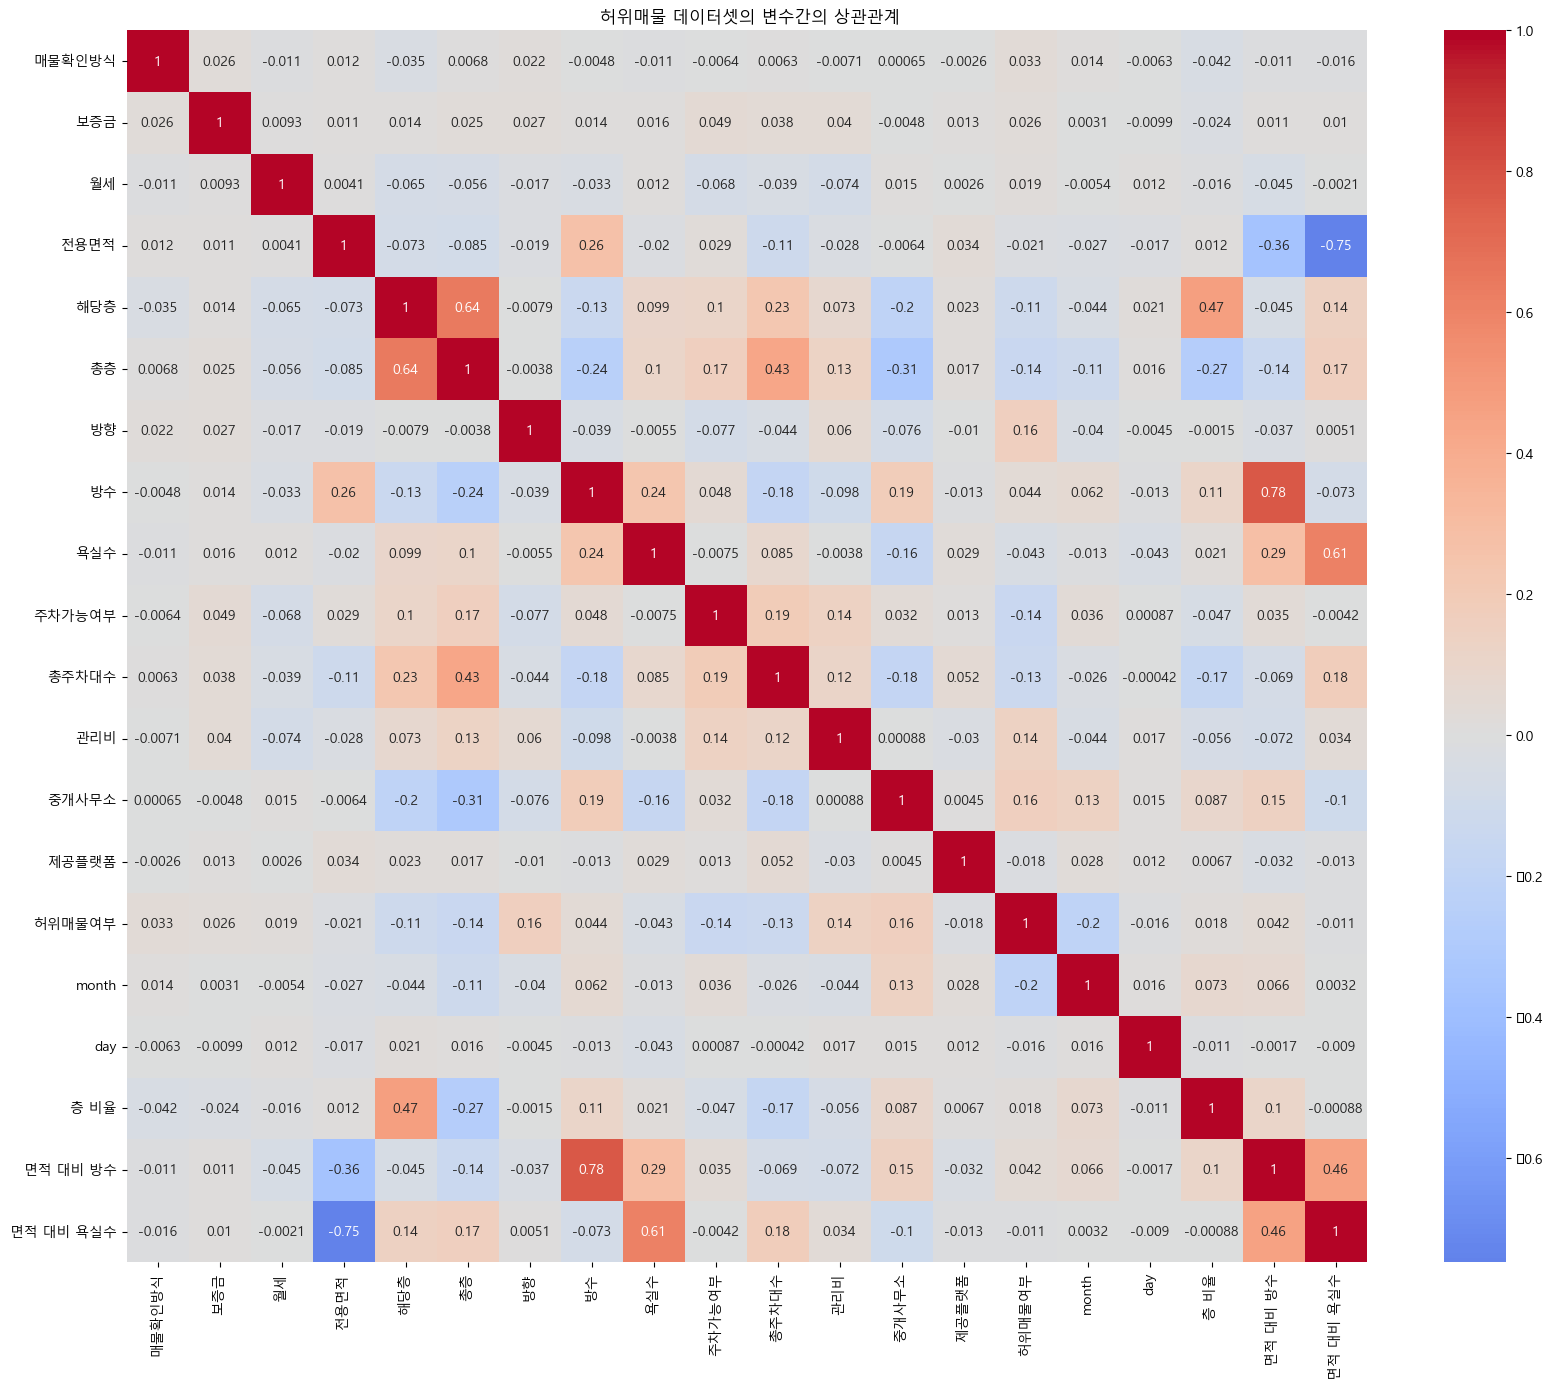

In [282]:
# 상관계수를 확인하기 위해 히트맵을 그리기
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'  # 한글 폰트 설정 (윈도우의 경우)

# 히트맵 생성
corr= train.select_dtypes(include="number").corr()
plt.figure(figsize=(20,16))
sns.heatmap(corr,annot=True, cmap="coolwarm",center=0)
plt.title(" 허위매물 데이터셋의 변수간의 상관관계")
plt.show()

# 상관계수가 높은 변수 중 하나만 선택

In [283]:
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
import numpy as np

# 독립 변수(X)와 종속 변수(y) 설정
target = "허위매물여부"
X1 = train.drop(columns=[target])
y1 = train[target]

X2= test.drop(columns=[target])
y2= test[target]


# 피처 스케일링
scaler = StandardScaler()
X1_scaled = pd.DataFrame(
    scaler.fit_transform(X1),
    columns=X1.columns,
    index=X1.index   # 인덱스 맞추기
)

X2_scaled= pd.DataFrame(
    scaler.fit_transform(X2),
    columns= X2.columns,
    index=X2.index
)


# 상수항 추가
X1_scaled = sm.add_constant(X1_scaled)
X2_scaled= sm.add_constant(X2_scaled)

# 로지스틱 회귀
logit_model = sm.Logit(y1, X1_scaled)
results = logit_model.fit(method="bfgs", maxiter=100)
print(results.summary())

print()
print()
print()

logit_model = sm.Logit(y2, X2_scaled)
results = logit_model.fit(method="bfgs", maxiter=100)
print(results.summary())



Optimization terminated successfully.
         Current function value: 0.281718
         Iterations: 86
         Function evaluations: 87
         Gradient evaluations: 87
                           Logit Regression Results                           
Dep. Variable:                 허위매물여부   No. Observations:                 1961
Model:                          Logit   Df Residuals:                     1941
Method:                           MLE   Df Model:                           19
Date:                Fri, 20 Feb 2026   Pseudo R-squ.:                  0.2379
Time:                        15:53:26   Log-Likelihood:                -552.45
converged:                       True   LL-Null:                       -724.86
Covariance Type:            nonrobust   LLR p-value:                 1.197e-61
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.7698      0.123    -2

In [284]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report
)

# 검증셋 예측 
y2_proba = results.predict(X2_scaled)           # 확률
y2_pred = (y2_proba >= 0.5).astype(int)        # 0/1 라벨

# 결과 DataFrame
result_df = test.copy()
result_df["예측확률"] = y2_proba
result_df["예측라벨"] = y2_pred

print("\n[검증셋 예측 결과 일부]")
show_cols = [target, "예측확률", "예측라벨"]
if "ID" in result_df.columns:
    show_cols = ["ID"] + show_cols
print(result_df[show_cols])

# 성능평가
print("\n[Validation Metrics]")
print("Accuracy :", round(accuracy_score(y2, y2_pred), 4))
print("Precision:", round(precision_score(y2, y2_pred, zero_division=0), 4))
print("Recall   :", round(recall_score(y2, y2_pred, zero_division=0), 4))
print("F1-score :", round(f1_score(y2, y2_pred, zero_division=0), 4))
print("ROC-AUC  :", round(roc_auc_score(y2, y2_proba), 4))

print("\n[Confusion Matrix]")
print(confusion_matrix(y2, y2_pred))

print("\n[Classification Report]")
print(classification_report(y2, y2_pred, digits=4))


[검증셋 예측 결과 일부]
      허위매물여부          예측확률  예측라벨
1641       0  2.961478e-02     0
439        0  8.234225e-15     0
1713       0  5.031829e-02     0
1859       0  3.911693e-01     0
2024       0  1.382818e-01     0
...      ...           ...   ...
1194       0  3.932511e-02     0
1915       0  7.232059e-01     1
2326       0  2.563625e-02     0
1382       0  1.358209e-01     0
541        0  4.137261e-02     0

[491 rows x 3 columns]

[Validation Metrics]
Accuracy : 0.8758
Precision: 0.4762
Recall   : 0.1667
F1-score : 0.2469
ROC-AUC  : 0.8416

[Confusion Matrix]
[[420  11]
 [ 50  10]]

[Classification Report]
              precision    recall  f1-score   support

           0     0.8936    0.9745    0.9323       431
           1     0.4762    0.1667    0.2469        60

    accuracy                         0.8758       491
   macro avg     0.6849    0.5706    0.5896       491
weighted avg     0.8426    0.8758    0.8485       491



# 